In [395]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pymongo

In [254]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Setup

In [255]:
client = pymongo.MongoClient('localhost', 27017)
db = client.carbon_calculator

In [377]:
transports = list(db.moves2.find())

In [378]:
tdf = pd.DataFrame(transports)
tdf['startDatetime'] = tdf.startDatetime.apply(pd.to_datetime)
tdf.index = tdf.startDatetime
tdf.sort_index(inplace=True)
tdf['cumulative'] = tdf.carbon.cumsum()

# What is the problem?
 - Anthropogenic climate change poses a significant threat to human well being on a global scale.
 - The dyanimcs of many physical systems critical to human (and animal and enviornmental) well-being are strongly influenced by global temperature.  
  - sea ice levels influence the jet stream, the movement of salt in the oceans
  - rainfall levels across the planet - influencing crop yields, arable land
  - disease transmission
  - food supply
  - storm intensity
  - heat and habitable areas
  - other extreme events 
 - There are many drivers of global temperature, but a primary one is the concentration of "greenhouses" gasses in the atmosphere.  These gasses trap energy from the sun that would otherwise be radiated back into the atmosphere as ultraviolet light, thus raising the average atmospheric temperature.  Scientists studing this relationship estimate that every metric ton of CO2 leads to an approximately 0.0000000000015 increase in mean surface temperature.
 - Since industrialization, the concentration of these gases has increased [TODO: ADD AMOUNT] (and the International Panel on Climate Change has confirmed that the release of greenhouse gases due to human activities is the primary driver of the recent temperature increase, with 95% certainty), leading to an estimated warming of __X__ degrees over [TODO: ADD TIME PERIOD].   
 - If carbon emissions grow at the same rate they have historically, we're on track to see a __X__ degree increase by the year 2100 
 - This would, in short, __be catestrophic__.
  - extreme events
  - food shortages
  - heat waves
  - disease transmisison

# Where should we be?
### What goal should we set for carbon emissions?
 - Presumably, the ideal would be to have no warming [is this the case?].  Unfortunately, since carbon is long-lasting (it lasts in the atmosphere for approximately 1000 years) and cumulative, that would mean we would mean negative emissions for the next __X__ years (with zero emissions thereafter) to achieve that goal.
 - Since this currently isn't feasible, the question is to what extent can we reduce emissions without doing more economic and social harm than we would avert.
 - The Paris Climate Talks have set a target of 1.5 degrees of warming by 2100 [TODO: add how they selected that number].  Emissions beyond that number risk catestrophic warming [TODO: enumerate reasons why], which justifies even siginifican economic outlays. [TODO: fill in with more details]
 - 1.5 degree target means we have a global carbon 'budget' of about about 1,000 gigatons.  Since we've already emitted 500 gigatons, we're down to 500 gt to emit over the next 84 years.
 - Given current emisisons and emission growth rates, we're on track to exhaust our budget by __YEAR Y__, meaning we'd need a cumulative reduction in emissions by __X__ percent each year.
 - The question of exactly who and how those reductions are made is an incredibly thorny political one.

# How am I contributing?

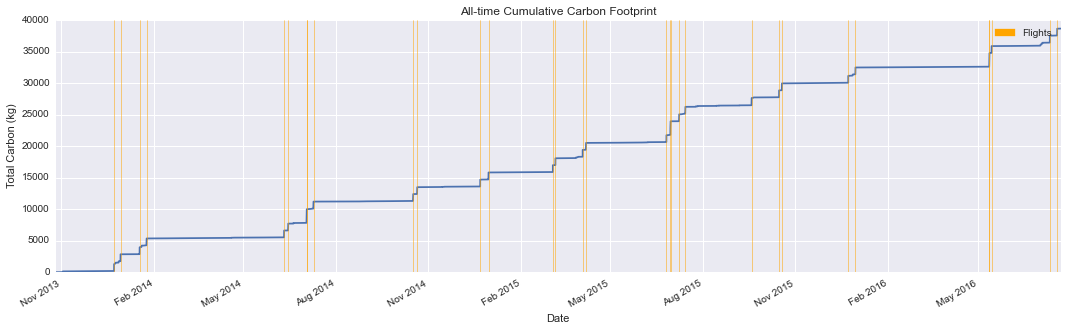

In [396]:
# Lifetime cummulative carbon footprint
tdf.cumulative.plot(figsize=(18,5))
plt.xlabel('Date')
plt.ylabel('Total Carbon (kg)')
plt.title('All-time Cumulative Carbon Footprint')
for row in tdf.to_dict(orient='records'):
    if row['type'] == 'airplane':
        plt.axvline(row['startDatetime'], color='orange', linewidth=.5)
orange = mpatches.Patch(color='orange', label='Flights')
plt.legend(handles=[orange])
plt.show()

In [397]:
grouped = tdf.groupby(lambda d: d.year)

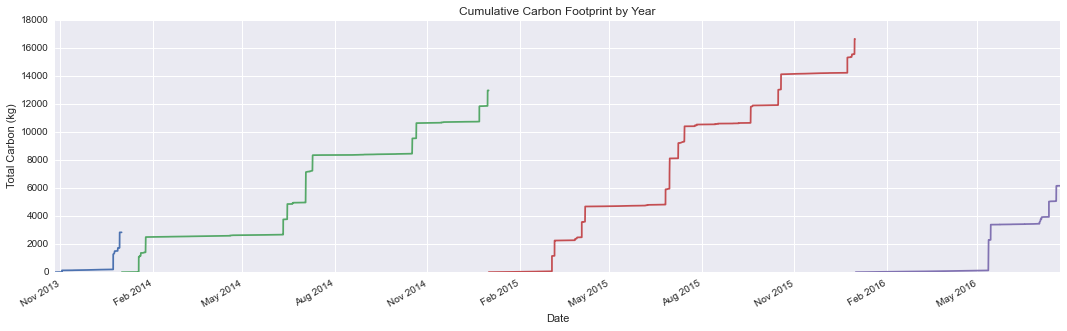

In [398]:
# Cumulative carbon footprint by year
for name, group in grouped:
    group.carbon.cumsum().plot(figsize=(18,5))
plt.title('Cumulative Carbon Footprint by Year')
plt.xlabel('Date')
plt.ylabel('Total Carbon (kg)');

In [383]:
grouped_type = tdf.groupby('type')

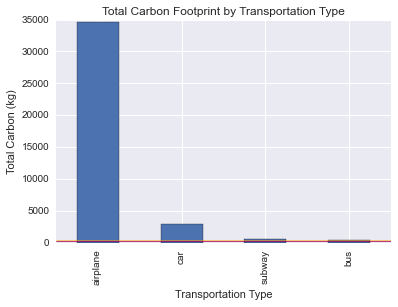

In [399]:
# Carbon distribution by transportation type
grouped_type.carbon.agg('sum').sort_values(ascending=False).plot(kind='bar')
plt.axhline(200, color='red', linewidth=.5)
plt.axhline(328, color='purple', linewidth=.5)
plt.axhline(457, color='orange', linewidth=.5)
plt.title('Total Carbon Footprint by Transportation Type')
plt.xlabel('Transportation Type')
plt.ylabel('Total Carbon (kg)')

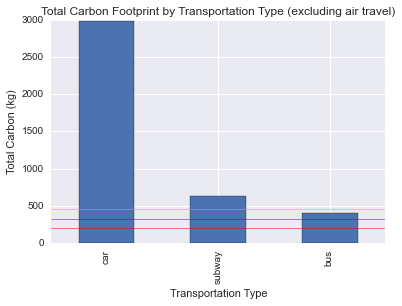

In [147]:
tdf[tdf.type != 'airplane'].groupby('type').carbon.agg('sum').sort_values(ascending=False).plot(kind='bar')
plt.axhline(200, color='red', linewidth=.5)
plt.axhline(328, color='purple', linewidth=.5)
plt.axhline(457, color='orange', linewidth=.5)
plt.title('Total Carbon Footprint by Transportation Type (excluding air travel)')
plt.xlabel('Transportation Type')
plt.ylabel('Total Carbon (kg)')

# Where Should I Be?  What goal should I set for my carbon responsibility?

In [389]:
degrees_per_ton = 0.0000000000015
population = 7400000000
years = 50
tons = np.arange(30)

In [390]:
temp_change = tons * degrees_per_ton * years * population

In [391]:
twenty_fifteen_tons = grouped.get_group(2015).carbon.sum() / 1000

In [392]:
personal_temp_change = twenty_fifteen_tons * degrees_per_ton * years * population

In [368]:
target_tons = 2 / (degrees_per_ton * years * population)

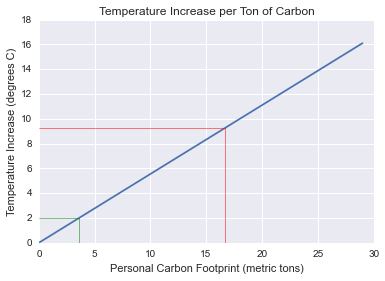

In [393]:
plt.plot(tons, dt)
plt.title('Temperature Increase per Ton of Carbon')
plt.xlabel('Personal Carbon Footprint (metric tons)')
plt.ylabel('Temperature Increase (degrees C)')
plt.plot([0, twenty_fifteen_tons], [personal_temp_change, personal_temp_change], color='red', linewidth=.5 )
plt.plot([twenty_fifteen_tons, twenty_fifteen_tons], [0, yt], color='red', linewidth=.5)
plt.plot([0, target_tons], [2, 2], color='green', linewidth=.5 )
plt.plot([target_tons, target_tons], [0, 2], color='green', linewidth=.5)
plt.show();

 - Why limit carbon?  As we all know, greenhouse gasses like carbon trap energy from the sun in the atmosphere.  The more of these gasses present the more energy trapped, raising the temperature.  This rise in temperature has lots of effects on many physical systems, including the jetstream, sea level, storm development, etc.  These effects get more dramatic as temperature rises, and become catestrophic at high enough levels.  But what is that termperature?  We surely don't want catastrophy, but we also don't want sever damage either.  So what temperature should we collectively try to limit warming to?
 - Given that effects aren't uniformally distributed across the world, that's a politically fraught question.  More than 100 countries, however, have adopted a warming limit of 2 degree climate stabilization target.  At this level, [TODO: ADD CONSEQUENCES].  And given that temperature rise is a function of atmospheric carbon, that means there's a specific level.
 - Indeed, despite considerable uncertainties in the exact relationship, modelling has indicated that every metric tonne of CO2 or CO2-equivalent which is emitted by humans results in a roughly linear increase in global atmospheric temperature by approximately 0.0000000000015 degrees Celsius.
 - In general, each degree C of global temperature increase can be expected to produce:
  - 5-10% changes in precipitation across many regions
  - 3-10% increases in the amount of rain falling during the heaviest precipitation events
  - 5-10% changes in streamflow across many river basins
  - 15% decreases in the annually averaged extent of sea ice across the Arctic Ocean, with 25% decreases in the yearly minimum extent in September
  - 5-15% reductions in the yields of crops as currently grown
  - 200-400% increases in the area burned by wildfire in parts of the western United States
 - The components of that budget are: $E_{FF} + E_{LUC} + G_{ATM} - (S_{OCEAN} + S_{LAND})$
 - The budget is balanced if $E_{FF} + E_{LUC} = G_{ATM} + S_{OCEAN} + S_{LAND}$
 - It's estimated that limiting outut from 2000
 - If each person got a fair share of that budget, what would that be?  What is fair share?
 -  The best estimate is that 1,000 gigatonnes of human-emitted carbon emissions leads to about 1.75°C (3.15°F) increase in global average temperature
 - Cumulative carbon emissions to date (2010) are about 500 gigatonnes, and the rate of global emissions is increasing. Based on current understanding, this warming is expected to be nearly irreversible for more than 1,000 years.
 - Many aspects of climate are expected to change in a linear fashion as temperatures rise

- [Carbon Targets - Your Footprint](http://shrinkthatfootprint.com/carbon-targets-for-your-footprint)

# How Can I Get There? What's the best way to get there?

- Reductions
 - Reducing flights
 - Reducing cab rides
 - Replacing subway trips with bike rides
 - Replacing short car rides with bike rides
- Offests
- Lobbying
 - Carbon taxes
- Geoengineering
 - Carbon capture and sequestration
- Carbon Pricing

- [Cool Earth](https://www.coolearth.org/)
- [Cool Earth Giving What We Can Report](http://preview.givingwhatwecan.org/report/2CFCCfUSi4icqeS6emE046)
- [Citizen's Climate Lobby GWWC Report](https://www.givingwhatwecan.org/charity/ccl/)
- [Carbonfund.org](https://carbonfund.org/)

## Notes / Resources
 - [How much action does climate change warrant - Harvard EA](http://www.harvardea.org/blog/2015/9/12/how-much-attention-does-climate-change-warrant)
 - [Sharing what's left of the pie just got easier](http://roadtoparis.info/2014/12/05/sharing-whats-left-carbon-emissions-pie-just-got-little-easier/)
 - [Giving What We Can Climat Change Report](https://www.givingwhatwecan.org/cause/climate-change/)

In [250]:
# fig, axes = plt.subplots(nrows=2, ncols=2);
# grouped_type.get_group('car').carbon.hist(bins=100); axes[0,0];
# grouped_type.get_group('bus').carbon.hist(bins=100); axes[0,1];
# grouped_type.get_group('airplane').carbon.hist(bins=100); axes[1,0];
# grouped_type.get_group('subway').carbon.hist(bins=100); axes[1,1];

In [245]:
# g = sns.FacetGrid(tdf, col="type", size=4, aspect=2, col_wrap=2)
# g.map(sns.distplot, "carbon", bins=100);

In [ ]:
# plt.axhline(200, color='red', linewidth=.5)
# plt.axhline(328, color='purple', linewidth=.5)
# plt.axhline(457, color='orange', linewidth=.5)

In [128]:
# sdf = pd.DataFrame(tdf.groupby(lambda d: d.year).carbon.agg('cumsum'))

In [129]:
# sdf['year'] = pd.Series(sdf.index).apply(lambda d: d.year).values

In [130]:
# def lineplot(x, y, **kwargs):
#     ax = plt.gca()
#     data = kwargs.pop("carbon")
#     data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)

In [212]:
# g = sns.FacetGrid(sdf, col="year", size=4, aspect=2, col_wrap=2)
# g.map(plt.plot, "carbon")

In [228]:
# cumulative sum by year
# tdf.groupby(lambda d: d.year).carbon.agg('cumsum').plot()

In [185]:
# carbon per month
# tdf.groupby(lambda d: d.month).carbon.agg('sum').plot(kind='bar', figsize=(18,4))

In [187]:
# sum of carbon per month for each year
# tdf.groupby([lambda d: d.year, lambda d: d.month]).carbon.agg('sum').plot(kind='bar', figsize=(18,4))

In [171]:
# tdf.startDatetime.value_counts()